# Lab 0 - Python and Jupyter notebook introduction

Collaborators: NONE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Warm-up Exercises 

Try the following commands on your jupyter notebook or python editor and see what output they produce.

In [2]:
a = 1 + 5
b = 2
c = a + b
print(a / b)
print(a // b)
print(a - b)
print(a * b)
print(a**b)

3.0
3
4
12
36


In [3]:
a = np.array([[3, 1],
              [1, 3]])
b = np.array([[3],
              [5]])
print(a * b)
print(np.dot(a, b))
print(np.dot(b.T, a))
c = a**(-1.0)
print(c * a)

[[ 9  3]
 [ 5 15]]
[[14]
 [18]]
[[14 18]]
[[1. 1.]
 [1. 1.]]


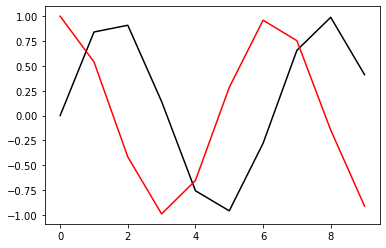

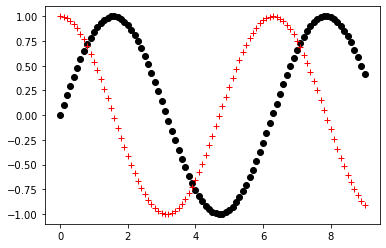

In [4]:
t = np.arange(10)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'k', t, h, 'r');

t = np.arange(0, 9.1, 0.1)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'ok', t, h, '+r');

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[1.00230524e+00 1.78186583e+01 3.16774344e+02 5.63151182e+03
 1.00115196e+05 1.77981556e+06 3.16409854e+07 5.62503203e+08
 1.00000000e+10]
[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01]


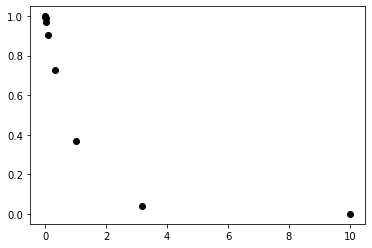

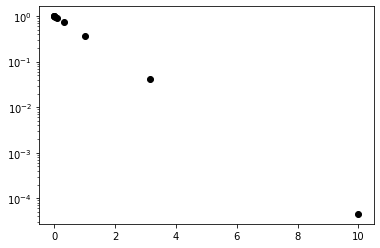

In [5]:
t = np.linspace(0, 10, 20)
print(t)
t = np.logspace(0.001, 10, 9)
print(t)
t = np.logspace(-3, 1, 9)
print(t)
y = np.exp(-t)

plt.figure()
plt.plot(t, y, 'ok')
plt.figure()
plt.semilogy(t, y, 'ok')

# Integration Function

Here is a more complicated function that computes the integral $y(x)$ with interval $dx$:

$$c = \int y(x) dx \sim \sum_{i=1}^N y_i dx_i .$$

It can deal with both cases of even and uneven sampling.

In [6]:
def integral(y, dx):
    # function c = integral(y, dx)
    # To numerically calculate integral of vector y with interval dx:
    # c = integral[ y(x) dx]
    # ------ This is a demonstration program ------
    n = len(y) # Get the length of vector y
    nx = len(dx) if np.iterable(dx) else 1
    c = 0 # initialize c because we are going to use it
    # dx is a scalar <=> x is equally spaced
    if nx == 1: # ’==’, equal to, as a condition
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx / 2
    # x is not equally spaced, then length of dx has to be n-1
    elif nx == n-1:
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx[k-1] / 2
    # If nx is not 1 or n-1, display an error messege and terminate program
    else:
        print('Lengths of y and dx do not match!')
    return c


Save this program as `integral.py`. Now we can call it to compute $\int_0^\pi \sin(t) dt$
with an evenly sampled time series (`even.py`).

1.999314849324063


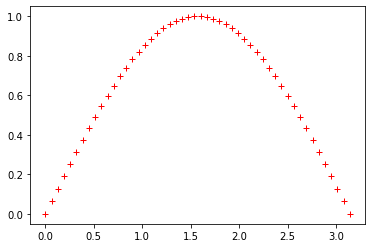

In [16]:
# number of samples
nt = 50
# generate time vector
t = np.linspace(0, np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.sin(t)
plt.plot(t, y, 'r+')
c = integral(y, dt)
print(c)

## Part 1

First plot $y(t)$. Is the output $c$ value what you are expecting for
$\int_0^\pi \sin(t) dt$? How can you improve the accuracy of your computation?

1.999314849324063


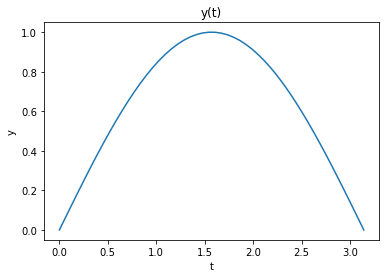

In [17]:
plt.plot(t,y)
plt.title("y(t)")
plt.xlabel("t")
plt.ylabel("y")

print(c)

The value of 1.995 was not what I was expecting for the value of c, as the integral should produce a value of 2 exactly. To improve the accuracy of the computation, I could increase the number of samples used to plot the function. FOr example, when I increase nt to 50, I get c = 1.999, which is way more accurate than 1.995.

## Part 2

For an unevenly spaced time series that depicts $\sin(4 \pi t^2)$ (so-called chirp function),
compute $\int_0^1 \sin(4 \pi t^2) dt$ (saved as `uneven.py`).

0.13609684944836983


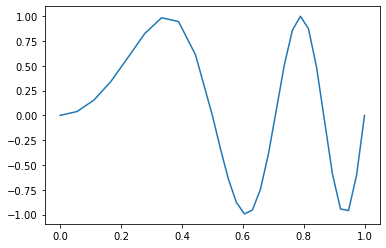

In [21]:
nt = 10
# sampling between [0,0.5]
t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
t = np.concatenate((t1[:-1], t2))
# compute y values (f=2t)
y = np.sin(2 * np.pi * 2 * t**2)
plt.plot(t, y)
# compute sampling interval vector
dt = t[1:] - t[:-1]
c = integral(y, dt)
print(c)

Show your plot of $y(t)$ for $nt = 100$. Try different $nt$ values and see
how the integral results change. Write a `for` loop around the statements above to try
a series of `nt` values (e.g, 10, 50, 100, 500, 1000) and generate a plot of $c(nt)$.
What value does $c$ converge to after using larger and larger $nt$? (Please include your
modified Python code.)

0.13716087327575752


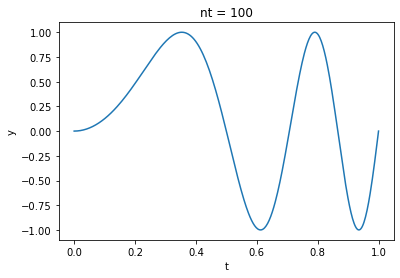

In [50]:
nt = 100
# sampling between [0,0.5]
t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
t = np.concatenate((t1[:-1], t2))
# compute y values (f=2t)
y = np.sin(2 * np.pi * 2 * t**2)
plt.plot(t, y)
plt.title("nt = 100")
plt.xlabel("t")
plt.ylabel("y")
# compute sampling interval vector
dt = t[1:] - t[:-1]
c = integral(y, dt)
print(c)

0.13716087327575752
0.13716474551843225
0.1371660751890768
0.13716668446624972
0.13716701336235002
0.13716721082697464
0.137167338589072
0.1371674259740867
0.13716748836305367
0.1371675344540047


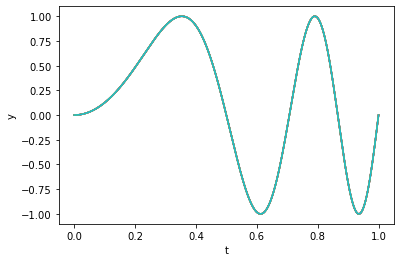

Text(0, 0.5, 'c')

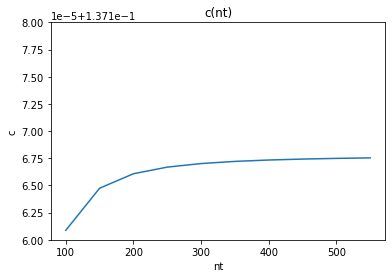

In [78]:
nt = 100

nts = np.zeros(10)
cs = np.zeros(10)

for i in range(0,10):
    # sampling between [0,0.5]
    t1 = np.linspace(0, 0.5, nt)
    # double sampling between [0.5,1]
    t2 = np.linspace(0.5, 1, 2*nt)
    # concatenate time vector
    t = np.concatenate((t1[:-1], t2))
    # compute y values (f=2t)
    y = np.sin(2 * np.pi * 2 * t**2)
    plt.plot(t, y)
    plt.xlabel("t")
    plt.ylabel("y")
    # compute sampling interval vector
    dt = t[1:] - t[:-1]
    c = integral(y, dt)
    cs[i] = c
    nts[i] = nt
    nt = nt+50
    print(c)
plt.show()
plt.plot(nts, cs)
plt.ylim(0.13716, 0.13718)
plt.title("c(nt)")
plt.xlabel("nt")
plt.ylabel("c")

As the value of nt increases, the value of c converges to about 0.137168.

# Accuracy of Sampling

Let us sample the function $g(t) = \cos(2 \pi f t)$ at sampling interval $dt = 1$, for frequency values of
$f = 0, 0.25, 0.5, 0.75, 1.0$ hertz.

In each case, plot on the screen the points of the resulting time series (as isolated red crosses) to
see how well it approximates $g(t)$ (plotted as a blue-dotted line, try a very small $dt$ fine
sampling). Submit only plots for frequencies of $0.25$ and $0.75$
Hertz, use xlabel, ylabel, title commands to annotate each plot.
For each frequency that you investigated, do you think the sampling time series is a fair representation of
the original time series $g(t)$? What is the apparent frequency for the sampling time series? (Figure out
after how many points (N) the series repeats itself, then the apparent frequency = 1/(N*dt). You can do this either
mathematically or by inspection. A flat time series has apparent frequency = 0.) Can you guess with a
sampling interval of $dt = 1$, what is the maximum frequency $f$ of $g(t)$
such that it can be fairly represented by the discrete time series? (Please attach your Python code.)

Text(0, 0.5, 'Position')

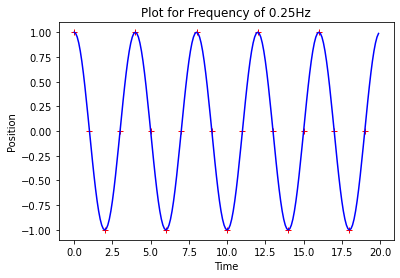

In [95]:
t = np.arange(0,20,1)
g1 = np.cos(2*np.pi*0.25*t)
g2 = np.cos(2*np.pi*0.75*t)

plt.plot(t, g1, 'r+')

t2 = np.arange(0,20, 0.1)
y1 = np.cos(2*np.pi*0.25*t2)
plt.plot(t2, y1, color = "blue")

plt.title("Plot for Frequency of 0.25Hz")
plt.xlabel("Time")
plt.ylabel("Position")

Text(0, 0.5, 'Position')

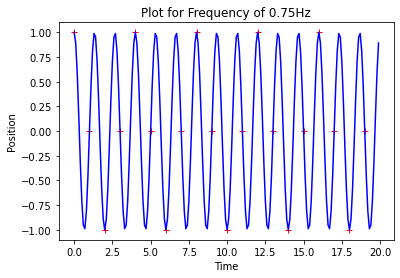

In [96]:
plt.plot(t, g2, 'r+')

y2 = np.cos(2*np.pi*0.75*t2)
plt.plot(t2, y2, color = "blue")

plt.title("Plot for Frequency of 0.75Hz")
plt.xlabel("Time")
plt.ylabel("Position")

It seems that the sampling time frequency is accurate for the smaller frequencies. For example, for 0.25Hz, there are red crosses at each exterma, and so you can read off that the frequncy in 0.25Hz. For 0.75Hz however, there are only red crosses at every 3 extrema so the frequency does not match that of the blue cosine wave. The apparent frequncy for the apparent sampling time wave is about 0.20Hz.

Through trial and error, I found the maximum frequency that f(t) can be fairly represent by the discrete time series is 0.75Hz. Anything above this converges to a straight line as it gets closer to 1.